# Recurrent Neural Networks

A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data. These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning; they are incorporated into popular applications such as Siri, voice search, and Google Translate.

RNNs are distinguished by their “memory” that enables it to factor previous input when producing output. The short-term memory allows the network to retain past information and, hence, uncover relationships between data points that are far from each other. 

<img src="images/applications.png"  width="500px">

**So why not use standard networks?**

In standard networks:

-	Inputs and outputs cannot be different lengths in different examples
-	Doesn’t share features learned across different positions in the text
-	It requires much larger number of parameters




## Characteristics fo RNNs
The main characteristic of RNNs, is that input and output do not need to have fixed length. Now, let’s take an idiom, such as “feeling under the weather”, which is commonly used when someone is ill, to aid us in the explanation of RNNs. In order for the idiom to make sense, it needs to be expressed in that specific order. As a result, recurrent networks need to account for the position of each word in the idiom and they use that information to predict the next word in the sequence.

Another distinguishing characteristic of recurrent networks is that they share parameters across each layer of the network. While feedforward networks have different weights across each node, recurrent neural networks share the same weight parameter within each layer of the network.

They leverage backpropagation through time (BPTT) algorithm to determine the gradients, which is slightly different from traditional backpropagation as it is specific to sequence data. The principles of BPTT are the same as traditional backpropagation, where the model trains itself by calculating errors from its output layer to its input layer. These calculations allow us to adjust and fit the parameters of the model appropriately. BPTT differs from the traditional approach in that BPTT sums errors at each time step whereas feedforward networks do not need to sum errors as they do not share parameters across each layer

<img src="images/rnn.png" style="background-color: white;" width="500px">



## Notation

The notation for an input sequence $x$ of length $T_x$ or an output sequence $y$ of length $Ty$ is as follows (note the new notation with chevrons around the indices to enumerate the tokens):

$$ x=x^{<1>},x^{<2>},...,x^{<t>},...,x^{<Tx>} $$
$$ y=y^{<1>},y^{<2>},...,y^{<t>},...,y^{<Ty>} $$

where:
- $T_x^{(i)}$: length of input of ith example
- $T_y^{(i)}$: length if output of ith example
- $X^{(i)<t>}$:  t-th element of ith example
- $Y^{(i)<t>}$: t-th element of ith output


The input and the output sequence don’t need to be of the same length $(T^{(i)}_x \neq T^{(i)}_y)$. Also the length of the individual training samples can vary $(T^{(i)}_y \neq T^{(j)}_y)$.

## Simple Unidirectional RNN

A simple RNN only has one layer through which the tokens pass during training/processing. However, the result of this processing has an influence on the processing of the next token. Consider the following sample architecture of a simple RNN:

<img src="images/example rnn.png">

The RNN processes each token $x^{<t>}$ individually from left to right, one after the other. In each step $t$ the RNN tries to predict the output $\hat{y}^{<t>}$ from the input token $x^{<t>}$ and the previous activation $a^{<t−1>}$. To determine the influence of the activation and the input token and the two weight matrices $W_{aa}$ and $W_{ax}$ are used. There is also a matrix $W_{ya}$ that governs the output predictions.

Those matrices are the same for each step, i.e. they are shared for a single training instance. This way the layer is recursively used to process the sequence. A single input token can therefore not only directly influence the output at a given time step, but also indirectly the output of subsequent steps (thus the term recurrent). Vice versa a single prediction at time step $<t>$ not only depends on a single input token, but on several previously seen tokens 

### Forward Propagation

The activation $a^{<t>}$ and prediction $ \hat{y} ^{<t>} $ for a single time step $t$ can be calculated as follows (for the first token the zero vector is often used as the previous activation):

$$ a^{<t>} = g_1(W_{aa}a^{<t-1>} + W_{ax}x^{<t>} + b_a) $$

$$ \hat{y}^{<t>} = g_2(W_{ya}a^{<t>} + b_y) $$


the activation functions $g_1$ and $g_2$ can be different. The activation function to calaculate the next activation $(g_1)$ is often **Tanh** or **ReLU**. The activation function to predict the next output $(g_2)$ is often the **Sigmoid** function for binary classification or else **Softmax**. The notation of the weight matrices is by convention so that the first index denotes the output quantity and the second index the input quantity. $W_{ax}$ for example means “use the weights in $W$ to compute some output $a$ from input $x$”.

This calculation can further be simplified by concatenating the matrices $W_{aa}$ and $W_{ax}$ into a single matrix $W_a$ and stacking:

$$
Wa = \begin{bmatrix} W_{aa} \ | \ W_{ax} \end{bmatrix} \\[10pt]
\begin{bmatrix} a^{<t-1>}, \ x^{<t>} \end{bmatrix} =  
\begin{bmatrix} a^{<t-1>} \\ x^{<t>} \end{bmatrix}
$$

The simplified formula to calculate forward propagation is then:

$$ a^{<t>} = g_1(W_{a} \begin{bmatrix} a^{<t-1>}, \ x^{<t>} \end{bmatrix} + b_a) $$

$$ \hat{y}^{<t>} = g_2(W_{y}a^{<t>} + b_y) $$

### Backpropagation Through Time

Because the input is read sequentially and the RNN computes a prediction in each step, the output is a sequence of predictions. The loss function for backprop for a single time step <t> in binary classfication could be:

$$ L^{<t>}(\hat{y}^{<t>},y^{<t>}) = −y^{<t>}log(\hat{y}^{<t>})−(1−y^{<t>})log(1−\hat{y}^{<t>}) $$

The formula to compute the overall cost for a sequence of $T_x$ predictions is therefore:

$$ \mathcal{L}(\hat{y},y) =  \sum_{t=1}^{Ty}\mathcal{L}^{<t>}(\hat{y}^{<t>},y^{<t>}) $$

## Types of RNNs

The four commonly used types of Recurrent Neural Networks are:

**1. One-to-One**

The most straightforward type of RNN is One-to-One, which allows a single input and a single output. It has fixed input and output sizes and acts as a standard neural network. The One-to-One application can be found in Image Classification.

<img src="images/one to one.png" width="500px">

**2. One-to-Many**

One-to-Many is a type of RNN that expects multiple outputs on a single input given to the model. The input size is fixed and gives a series of data outputs. Its applications can be found in applications like Music Generation and Image Captioning.

<img src="images/one to many.png" width="500px">

**3. Many-to-one**

Many-to-One RNN converges a sequence of inputs into a single output by a series of hidden layers learning the features. Sentiment Analysis is a common example of this type of Recurrent Neural Network.

<img src="images/many to one.png" width="500px">

**4. Many-to-many**

Many-to-Many is used to generate a sequence of output data from a sequence of input units. It is further divided into ﻿the following two subcategories:

- Equal Size: In this case, the input and output layer size is exactly the same, such as voice-to-text conversion.
  
<img src="images/many to many 1.png" width="500px">

- Unequal Size: In this case, inputs and outputs have different numbers of units. Its application can be found in Machine Translation.
  
<img src="images/many to many 2.png" width="500px">

## Limitations of RNN

Simple RNN models usually run into two major issues. These issues are related to gradient, which is the slope of the loss function along with the error function.

- **Vanishing Gradient**: Long sentences might have dependencies between it start and end. However, with many steps the gradients might become exponentially long, also known as vanishing gradients. (when the gradient becomes so small that updating parameters becomes insignificant; eventually the algorithm stops learning.)
  
- **Exploding Gradient** problem occurs when the gradient becomes too large, which makes the model unstable. In this case, larger error gradients accumulate, and the model weights become too large. This issue can cause longer training times and poor model performance.

<img src="images/decaying weights through time.png" width="500px">

The simple solution to these issues is to reduce the number of hidden layers within the neural network, which will reduce some complexity in RNNs. These issues can also be solved by using advanced RNN architectures such as LSTM and GRU.

## Advanced RNN Architectures

The simple RNN repeating modules have a basic structure with a single tanh layer. RNN simple structure suffers from short memory, where it struggles to retain previous time step information in larger sequential data. These problems can easily be solved by **long short term memory (LSTM)** and **gated recurrent unit (GRU)**, as they are capable of remembering long periods of information.

### Gated Recurrent Units

**Gated Recurrent Units (GRU)** are a modification for the hidden layeres in an RNN that help mitigating the problem of vanishing gradients. GRU are cells in a RNN that have a memory which serves as an additional input to make a prediction. To better understand how GRU cells work, consider the following image depicting how a normal RNN cell works:

<img src="images/rnn-cell.png">

#### Simple GRU

The following picture illustrates the calculations inside a GRU cell:

<img src="images/gru-cell.png">

GRU units have a memory cell $c^{<t>}$ to “remember”. Note that for GRU cells $c^{<t>}= a^{<t>}$ but we still use the variable $c$ for consistency reasons, we use the same symbol. In each time step a value $\tilde{c}$ is calculated as a candidate to replace the existing content of the memory cell $c$. This candidate uses an activation function (e.g. tanh), its own trainable parameter matrix $W_c$ and a separate bias $b_c$.

$$
\tilde{c}^{<t>} = \tanh \left( W_c \left[ c^{<t-1>}, x^{<t>} \right]  + b_c \right)
$$

After calculating the candidate $\tilde{c}^{<t>}$ we use an update-gate $Γ_u$ to decide whether we should update the cell with this value or keep the old value. The value for $\Gamma_u$ can be calculated using another trainable parameter matrix $W_u$ and bias $b_u$. Because Sigmoid is used as the activation function, the values for $\Gamma_u$ are always between 0 and 1 (for simplification you can also think of $\Gamma_u$ to be either exactly 0 or exactly 1).

$$
\Gamma_u = \sigma\left(  W_u \left[ c^{<t-1>, x^{<t>}} \right] + b_u \right)
$$

This gate is the key component of a GRU because it “decides” when to update the memory cell. Combining previous two equations gives us the following formula to calculate the value of the memory cell in each time step:

$$
c^{<t>} = \Gamma_u * \tilde{c}^{<t>} + (1 - \Gamma_u) * c^{<t-1>}
$$

The black box in the figure refers to this equation

#### Full GRU

The above explanations described a simplified version of a GRU with only one gate $\Gamma_u$ to decide whether to update the cell value or not. Full GRUs however usually have an additional parameter $\Gamma_r$ that describes the relevance of individual features, which again uses its own parameter matrix $W_r$ and bias $b_r$ to be trained:

$$ \Gamma_r = \sigma\left(  W_r \left[ c^{<t-1>, x^{<t>}} \right] + b_r \right) $$

<img src="images/gru table.png" width="500px">

### Long Short Term Memory

An older alternative to GRU are Long Short Term Memory (LSTM) cells. LSTM cells can be considered a more general and more powerful version of GRU cells. Such cells also use a memory cell $c$ to remember something. However, the update of this cell is slightly different from GRU cells.

In contrast to GRU cells, the memory cell does not correspond to the activation value anymore, so for LSTM-cells c<t>≠a<t>. It also does not use a relevance gate $\Gamma_r$ anymore but rather a forget-gate $\Gamma_f$ that governs whether to forget the current cell value or not. Finally, there is a third parameter $\Gamma_o$ to act as output-gate and is used to scale the update memory cell value to calculate the activation value for the next iteration.

<img src="images/lstm-cell 2.png" width="500px">

# 

<img src="images/lstm table.png" width="500px">

### GRU vs. LSTM

There is not an universal rule when to use GRU- or LSTM-cells. GRU cells represent a simpler model, hence they are more suitable to build a bigger RNN model because they are computationally more efficient and the RNN will scale faster. On the other hand the LSTM-cells are more powerful and more flexible, but they also require more training data. In case of doubt, try LSTM cells because they have sort of become state of the art for RNN.


## Bidirectional RNNs

Unidirectional RNNs only consider already seen tokens at a time step $<t>$ to make a prediction. In contrast, bidirectional RNN (BRNN) also take subsequent (future) tokens into account. This is for example helpful for named entity recognition (NER) when trying to predict whether the word `Teddy` is part of a name in the following two sencences:

`<he> <said> <teddy> <bears> <are> <on> <sale> <EOS>`

`<he> <said> <teddy> <roosevelt> <was> <a> <great> <president> <EOS>`

Just by looking at the previously seen words it is not clear at time step $t=3$ whether $<teddy>$ is part of a name or not. To do that we need the information of the following tokens. A BRNN can do this using an additional layer. During forward propagation the activation values $\stackrel{\rightarrow}{a}$ are computed as seen above from the input tokens and the previous activation values using an RNN cell (normal RNN cell, GRU or LSTM). The second part of forward propagation calculates the values $\stackrel{\leftarrow}{a}$ from left to right using the additional layer. The following picture illustrates this. Note that the arrows in blue and green only indicate the order in which the tokens are evaluated. It does not indicate backpropagation.

<img src="images/brnn.png">

After a single pass of forward propagation a prediction at time step $t$ can be made by stacking the activations of both directions and calculating the prediction value as follows:

$$ \hat{y}^{<t>} = g \left( W_y \left[ \overrightarrow{a}^{<t>}, \overleftarrow{a}^{<t>} \right] + b_y \right) $$

The advantage of BRNN is that it allows to take into account words from both directions when making a prediction, which makes it a good fit for many language-related applications like machine translation. On the downside, because tokens from both directions are considered, the whole sequence needs to be processed before a prediction can be made. This makes it unsuitable for tasks like real-time speech recognition.

## Deep RNN

The RNNs we have seen so far consisted actually of only one layer (with the exception of the BRNN which used an additional layer for the reverse direction). We can however stack several of those layers on top of each other to get a Deep RNN. In such a network, the results from one layer are passed on to the next layer in each time step $t$:

<img src="images/deep-rnn.png">

The activation $a^{[l]<t>}$ for layer $l$ at time step $t$ can be calculated as follows:

$$ a^{[l]<t>} = g\left( W_a^{[l]} \left[ a^{[l]<t-1>}, a^{[l-1]<t>} \right] + b_a^{[l]}\right) $$

Deep-RNN can become computationally very expensive quickly, therefore they usually do not contain as many stacked layers as we would expect in a conventional Deep-NN.

# MasterCard Stock Price Prediction Using LSTM & GRU

In this project, we are going to use Kaggle’s MasterCard stock dataset from May-25-2006 to Oct-11-2021 and train the LSTM and GRU models to forecast the stock price. 

## Packages

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)


## Data Analysis

In [2]:
dataset = pd.read_csv(
    "data/Mastercard_stock_history.csv", index_col="Date", parse_dates=["Date"]
).drop(["Dividends", "Stock Splits"], axis=1)
print(dataset.head())

                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000


In [3]:
dataset.describe()

,Open,High,Low,Close,Volume
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08


**High** provides us information of how high the values of the share went on the given day. Let’s focus on the High column as we are going to use it to train the model.

The minimum stock price is $4.10, and the highest is $400.5. The mean is at $105.9 and the standard deviation $107.3, which means that stocks have high variance.

### Plot distributions

MasterCard stock prices have been on the rise since 2016. It had a dip in the first quarter of 2020 but it gained a stable position in the latter half of the year. Our test dataset consists of one year, from 2021 to 2022, and the rest of the dataset is used for training.

Let's train_test_plot function which takes three arguments: dataset, tstart, and tend and plots a simple line graph. The tstart and tend are time limits in years. We can change these arguments to analyze specific periods. The line plot is divided into two parts: train and test. This will allow us to decide the distribution of the test dataset.

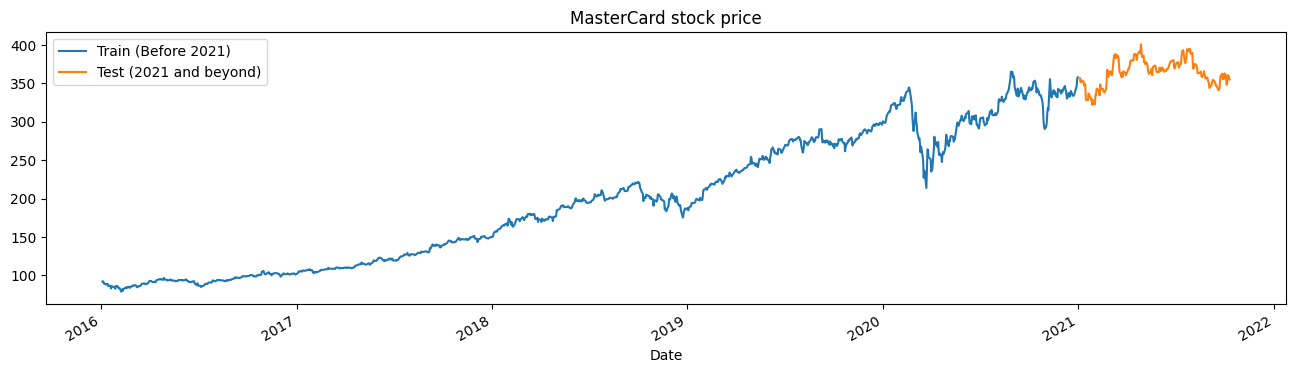

In [6]:
t_start = 2016
t_end = 2020

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset,t_start,t_end)


## Data Preprocessing

First, we need to divide our dataset into training and testing sets

In [7]:
def train_test_split(dataset, t_start, t_end):
    train = dataset.loc[f"{t_start}":f"{t_end}", "High"].values
    test = dataset.loc[f"{t_end+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(dataset, t_start, t_end)

In [8]:
print(training_set.shape)
print(test_set.shape)

(1259,)
(195,)


We will use the `MinMaxScaler` function to standardize our training set, which will help us avoid the outliers or anomalies. You can also try using `StandardScaler` or any other scalar function to normalize your data and improve model performance.

In [9]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

Now, we need to create our data (X_train) and labels (y_train). The label of each subset of numbers is the number just after it in the original sequence. For example, if the sequence is [1,2,3,4,5,6,7,8,9,10,11,12] and the n_step is three, then it will convert the sequence into three input timestamps and one output as shown below:

<table style="background-color: white; color: black;">
  <tr>
    <th style="width: 150px;">X</th>
    <th style="width: 50px;">y</th>
  </tr>
  <tr>
    <td>1,2,3</td>
    <td>4</td>
  </tr>
  <tr>
    <td>2,3,4</td>
    <td>5</td>
  </tr>
  <tr>
    <td>3,4,5</td>
    <td>6</td>
  </tr>
  <tr>
    <td>4,5,6</td>
    <td>7</td>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

In this project, we are using 60 n_steps. You can try to reduce or increase the number of steps to optimize model performance.


In [10]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)


We are working with univariate series, so the number of features is one, and we need to reshape the X_train to fit on the LSTM model. The X_train has [samples, timesteps], and we will reshape it to [samples, timesteps, features].

In [11]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)


## LSTM Model

The model consists of a single hidden layer of LSTM and an output layer. You can experiment with the number of units, as more units will give you better results. For this experiment, we will set LSTM units to **128**, **tanh** as activation, and set input size.

Finally, we will compile the model with an **RMSprop** optimizer and **mean square error** as a loss function.

In [52]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(128, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


The model will train on 50 epochs with 32 batch sizes. You can change the hyperparameters to reduce training time or improve the results. The model training was successfully completed with the best possible loss.

In [53]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
38/38 [==============================] - 4s 20ms/step - loss: 0.0141
Epoch 2/50
38/38 [==============================] - 1s 16ms/step - loss: 0.0026
Epoch 3/50
38/38 [==============================] - 1s 15ms/step - loss: 0.0025
Epoch 4/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0020
Epoch 5/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0015
Epoch 6/50
38/38 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 7/50
38/38 [==============================] - 1s 16ms/step - loss: 0.0011
Epoch 8/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 9/50
38/38 [==============================] - 1s 17ms/step - loss: 9.5345e-04
Epoch 10/50
38/38 [==============================] - 1s 16ms/step - loss: 0.0011
Epoch 11/50
38/38 [==============================] - 1s 15ms/step - loss: 8.5182e-04
Epoch 12/50
38/38 [==============================] - 1s 14ms/step - loss: 8.5268e-04
Epoch 13/50
38/38 [======

### Results
We are going to repeat preprocessing and normalize the test set. First of all we will transform then split the dataset into samples, reshape it, predict, and inverse transform the predictions into standard form.

We need to get the last n_steps samples from the training samples to be able to predict the first testing sample. starting from the last n_steps (60) in the training dataset, create the testing sequences. The first sequence will be x = (last 60 samples from training), y = (first sample from testing)

In [54]:
# Get all the High data from the dataset
dataset_total = dataset.loc[:,"High"]

# Retireve the data starting from the last 60 samples in the trainnig data
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values

# Reshape to one column as we have a univariate data
inputs = inputs.reshape(-1, 1)

# Scale using the fitted min max scaler
inputs = sc.transform(inputs)

# Split into sequqnce samples
X_test, y_test = split_sequence(inputs, n_steps)

# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)

# predict
predicted_stock_price = model_lstm.predict(X_test)

# inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


7/7 [==============================] - 1s 5ms/step


The plot_predictions function will plot a real versus predicted line chart. This will help us visualize the difference between actual and predicted values.

The return_rmse function takes in test and predicted arguments and prints out the `root mean square error` (rmse) metric.

In [55]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))


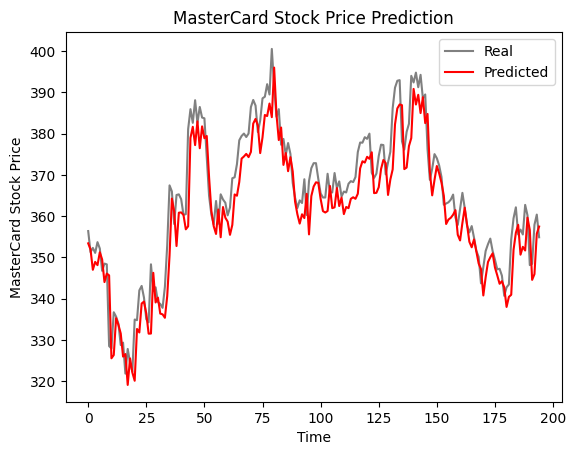

In [56]:
plot_predictions(test_set,predicted_stock_price)


The single-layered LSTM model has performed well.

In [57]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 6.44.


The results look promising as the model got 6.70 rmse on the test dataset.

## GRU Model
We are going to keep everything the same and just replace the LSTM layer with the GRU layer to properly compare the results. The model structure contains a single GRU layer with 128 units and an output layer.

In [48]:
model_gru = Sequential()
model_gru.add(GRU(128, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 128)               50304     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 3s 17ms/step - loss: 0.0148
Epoch 2/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0023
Epoch 3/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 4/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 5/50
38/38 [==============================] - 1s 15ms/step - loss: 9.3267e-04
Epoch 6/50
38/38 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 7/50
38/38 [==============================] - 1s 15ms/step - loss: 7.0573e-04
Epoch 8/50
38/38 [==============================] - 1s 15ms/step - loss: 7.9422e-04
Epoch 9/50
38/38 [==============================] - 1s 15ms/step - loss: 7.0371e-04
Epoch 10/50
38/38 [==============================] - 1s 16ms/step - loss: 7.5882e-04
Epoch 11/50
38/38 [==============================] - 1s 18ms/step - loss: 6.5734e-04
Epoch 12/50
38/38 [==============================] - 1s 16ms/step - loss: 5.4952e-04
Epoch 13/

### Results

7/7 [==============================] - 0s 5ms/step


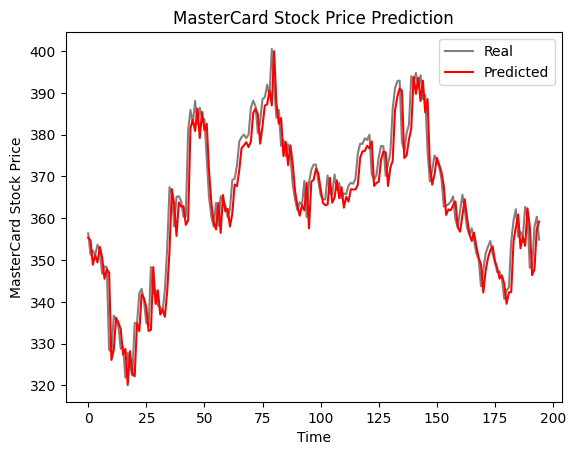

In [50]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)


As we can see, the real and predicted values are relatively close. The predicted line chart almost fits the actual values.

In [51]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 5.44.


GRU model got 5.50 rmse on the test dataset, which is an improvement from the LSTM model.